In [1]:
# Mount drive
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [2]:
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from scipy.fftpack import fft
import pywt
import sys

In [3]:
cd /content/gdrive/Othercomputers/PC/AI_DataScience_Training/AI_Healthcare/AI_Healthcare/ecg-processing/Digital-filtering-of-ecg-signal

/content/gdrive/Othercomputers/PC/AI_DataScience_Training/AI_Healthcare/AI_Healthcare/ecg-processing/Digital-filtering-of-ecg-signal


 ECG signal can be corrupted by unwanted interference such as power line interference, electrode contact noise, motion artefacts, muscle contraction, baseline drift, ECG signal amplitude modulation with respiration, instrumentation noise and electrosurgical nois

![](http://www.ni.com/cms/images/devzone/tut/2007-07-09_141618.jpg)

In [ ]:
ecgDF = pd.read_csv('ecg.csv')

In [ ]:
print ('Sampling frequency is: ')
samplingFreq = 1/(ecgDF['Time (s)'][10]-ecgDF['Time (s)'][9])
print (samplingFreq)
ecgDF


Sampling frequency is: 
3999.9999999986644


,Time (s),Channel 1 (V)
0,-1.12925,-0.015717
1,-1.12900,-0.013341
2,-1.12875,-0.015038
3,-1.12850,-0.012662
4,-1.12825,-0.015378
...,...,...
7995,0.86950,-0.019451
7996,0.86975,-0.021828
7997,0.87000,-0.018093
7998,0.87025,-0.018093


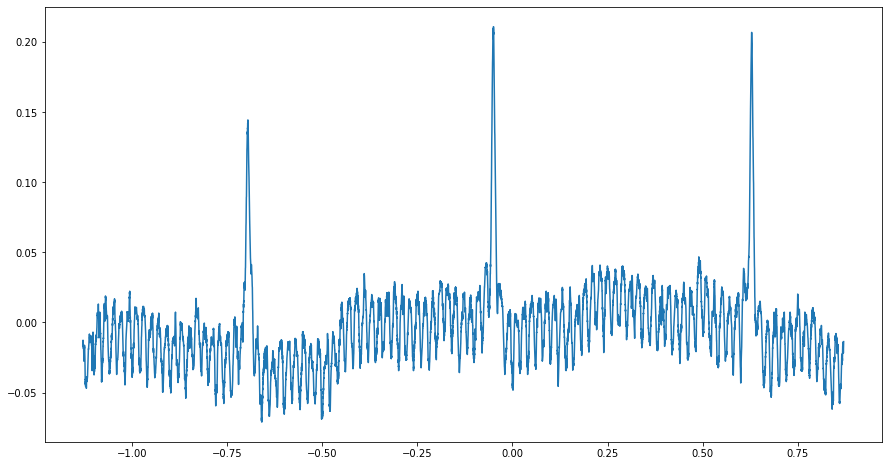

In [ ]:
# Time Domain Signal
matplotlib.rc('figure', figsize=(15, 8))
plt.plot(ecgDF['Time (s)'],ecgDF['Channel 1 (V)'])


Biomedical Engineer after getting Raw Signal from Device
![](https://images.indianexpress.com/2019/06/untitled-design-7-3.jpg)

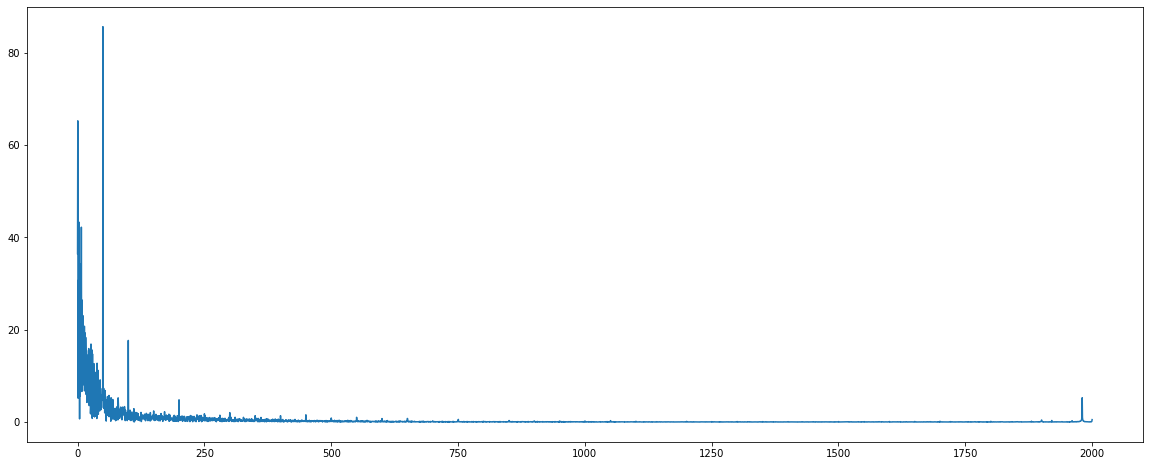

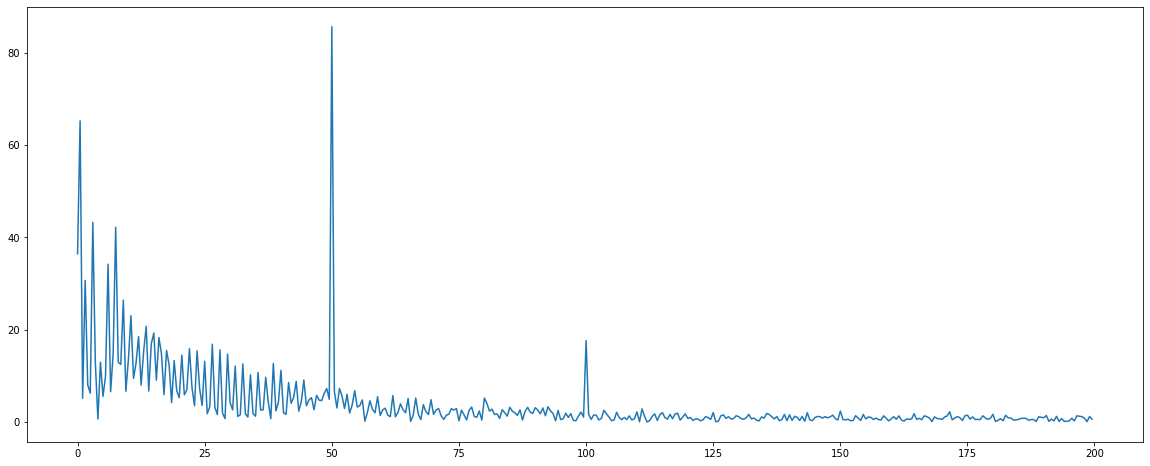

In [ ]:
# Frequency Domain
# FFT len is half size of the signal len
# Because of nyquist theorem only half of the sampling frequency can be seen in the sprectrum
ecgData = ecgDF['Channel 1 (V)'].values
fftData = np.abs( fft(ecgData) )
fftLen = int(len(fftData) / 2)
freqs = np.linspace(0,samplingFreq/2, fftLen )

matplotlib.rc('figure', figsize=(20, 8))

plt.figure()
plt.plot( freqs, fftData[0:fftLen] )
plt.figure()

plt.plot( freqs[0:400], fftData[0:400] )

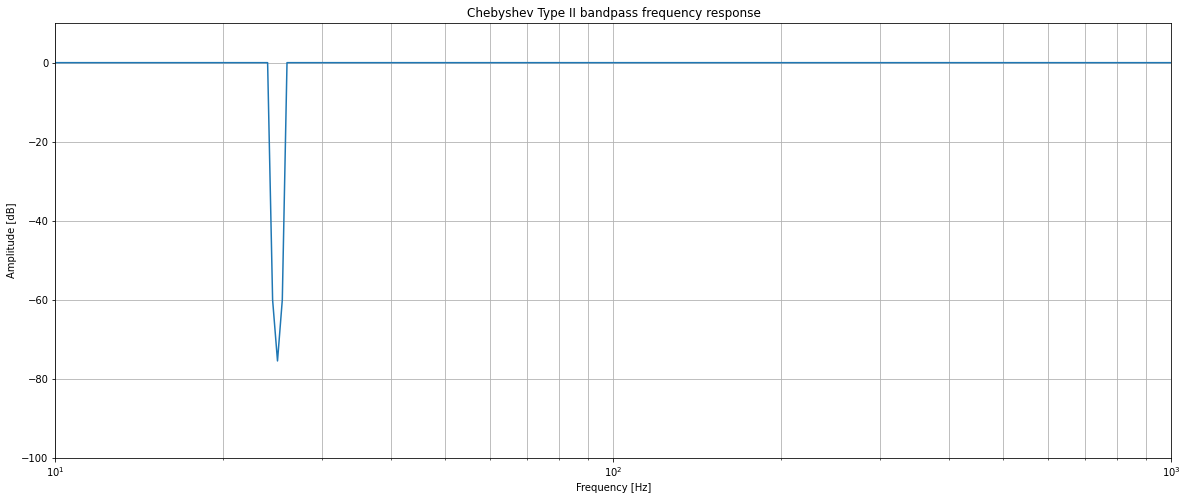

In [ ]:

## Design IIR filter
from scipy import signal
sos = signal.iirfilter(17, [49, 51], rs=60, btype='bandstop',
                        analog=False, ftype='cheby2', fs=4000,
                        output='sos')
w, h = signal.sosfreqz(sos, 2000, fs=2000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w, 20 * np.log10(np.maximum(abs(h), 1e-5)))
ax.set_title('Chebyshev Type II bandpass frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.show()


In [ ]:
## filter out 50 Hz noise
ecgFiltered = signal.sosfilt(sos, ecgData)

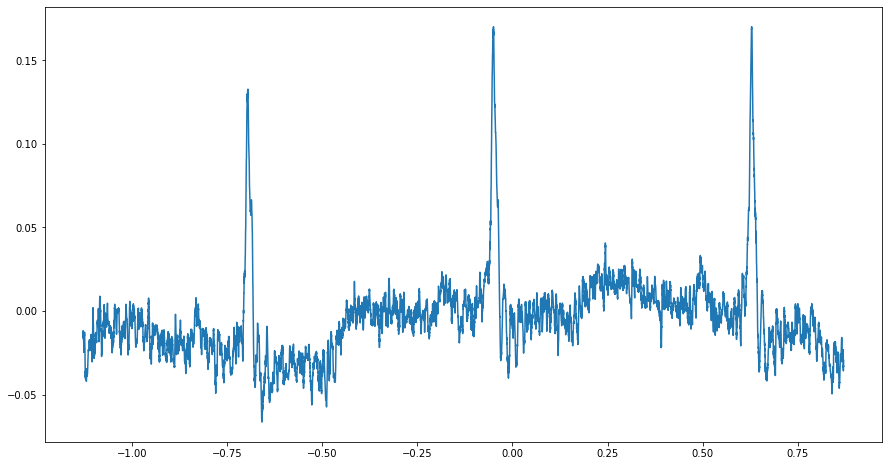

In [ ]:
# Time Domain Signal
matplotlib.rc('figure', figsize=(15, 8))
plt.plot(ecgDF['Time (s)'],ecgFiltered)

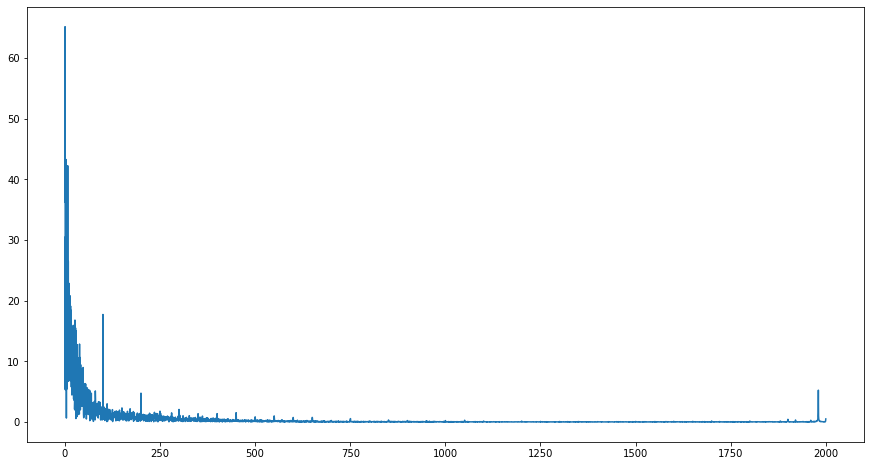

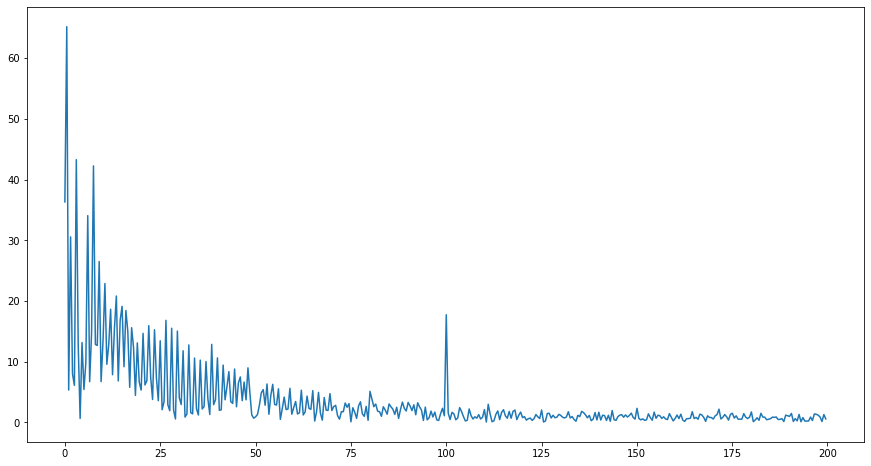

In [ ]:
# Frequency Domain
# FFT len is half size of the signal len
# Because of nyquist theorem only half of the sampling frequency can be seen in the sprectrum
fftData = np.abs( fft(ecgFiltered) )
fftLen = int(len(fftData) / 2)
freqs = np.linspace(0,samplingFreq/2, fftLen )

matplotlib.rc('figure', figsize=(15, 8))

plt.figure()
plt.plot( freqs, fftData[0:fftLen] )
plt.figure()

plt.plot( freqs[0:400], fftData[0:400] )

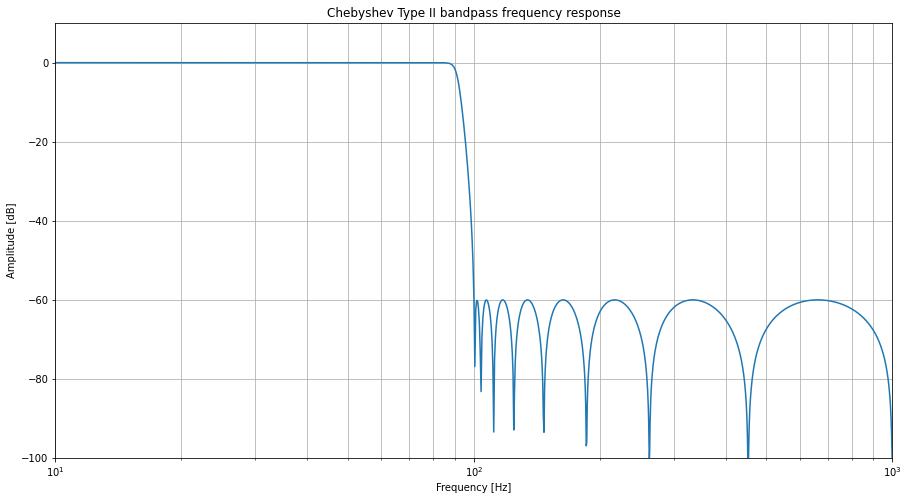

In [ ]:
## Design Bandpass IIR filter
sos2 = signal.iirfilter(17, [0.5, 200], rs=60, btype='bandpass',
                        analog=False, ftype='cheby2', fs=4000,
                        output='sos')
w, h = signal.sosfreqz(sos2, 2000, fs=2000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w, 20 * np.log10(np.maximum(abs(h), 1e-5)))
ax.set_title('Chebyshev Type II bandpass frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.show()


# fftData = np.abs( fft(ecgFiltered) )
# fftLen = int(len(fftData) / 2)
# freqs = np.linspace(0,samplingFreq/2, fftLen )

# matplotlib.rc('figure', figsize=(15, 8))

# plt.figure()
# plt.plot( freqs, fftData[0:fftLen] )
# plt.figure()

# plt.plot( freqs[0:400], fftData[0:400] )

In [ ]:
## filter out 50 Hz noise
ecgFiltered2 = signal.sosfilt(sos2, ecgFiltered)

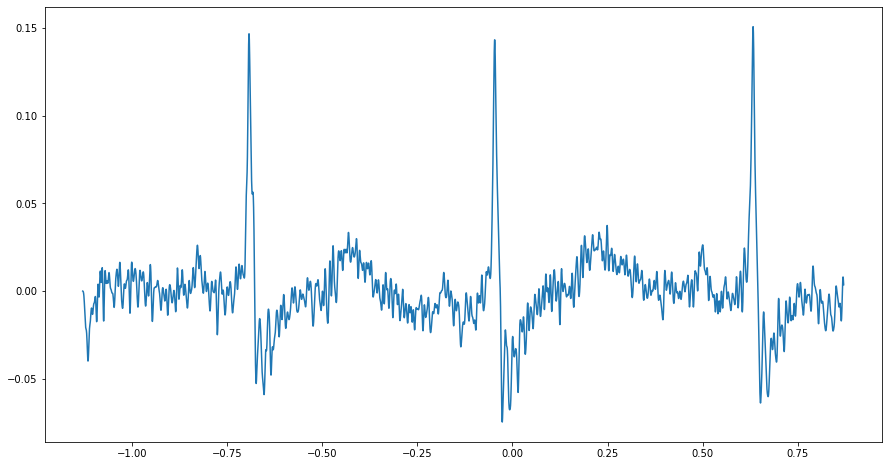

In [ ]:
# Time Domain Signal
matplotlib.rc('figure', figsize=(15, 8))
plt.plot(ecgDF['Time (s)'],ecgFiltered2)

![](http://www.ni.com/cms/images/devzone/tut/2007-07-09_141618.jpg)

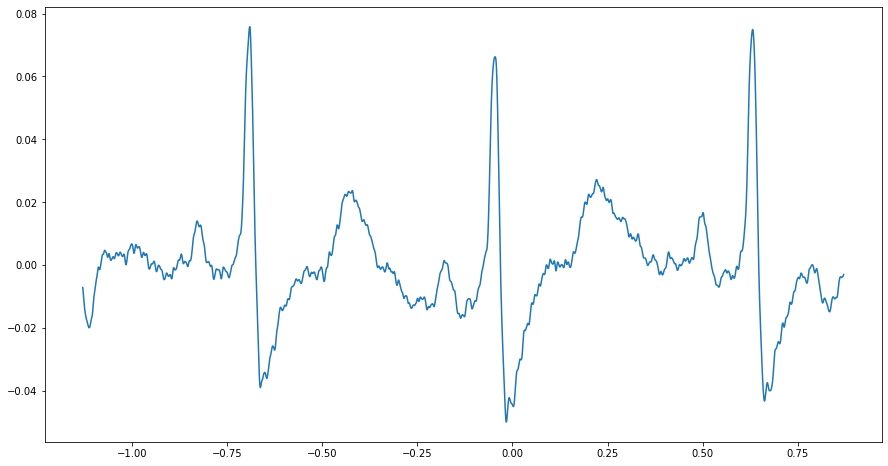

In [ ]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

MA_filtered = moving_average(ecgFiltered2, 100)
# Time Domain Signal
matplotlib.rc('figure', figsize=(15, 8))
plt.plot(ecgDF['Time (s)'],MA_filtered)


In [ ]:
def madev(d, axis=None):
    """ Mean absolute deviation of a signal """
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

### Wavelets

The term wavelet is often used to denote a signal located in time with a concentrated amount of energy. This “mother” wavelet is used to generate a set of “daughter”functions through the operations of scaling and dilation applied to the mother wavelet. This set forms an orthogonal basis that allows, using inner products, to decompose any given signal much like in the case of Fourier analysis. Wavelets, however, are superior to Fourier analysis for time information is not lost when moving to the frequency domain. This property makes them suitable for applications from diverse fields where the frequency content of a signal as well as the energy's temporal location is valuable.

**Wavelet transform decomposes a time series into waves that are localized not only in frequency but also in time.**


<img src="https://upload.wikimedia.org/wikipedia/commons/9/95/Continuous_wavelet_transform.gif">

## Denoising With Wavelets:

In one-dimension noisy signals, noise acts on the original signal through linear superposition.

Wavelet transform is a linear transform. Therefore, wavelet coefficients obtained through wavelet transform of  still contain two parts. One part is from the original signal , and the other part is brought from the noise . Wavelet transform can concentrate signal energy on some large wavelet coefficients and distribute the noise energy throughout the whole wavelet domain. Thus, large amplitude wavelet coefficients may be produced by the useful signal, and the small amplitude is likely to represent the noise. 

The Wavelet transform performs a correlation
analysis, therefore the output is expected to be
maximal when the input signal most resembles the
mother wavelet.


If a signal has its energy concentrated in a small
number of WL dimensions, its coefficients will be
relatively large compared to any other signal or noise
that its energy spread over a large number of
coefficients.


According to this characteristics of wavelet coefficients, Donoho and Johnstone proposed wavelet threshold method, which can be divided into three steps:

(1)	Choosing the appropriate wavelets basis and decomposition scale and computing the corresponding wavelet coefficients,

(2)	Selecting the proper threshold and obtaining the estimated values of the wavelet coefficients,

(3)	Reconstructing the signal based on the estimated values of wavelet coefficients by inverse wavelet transform.

In [ ]:
from IPython.display import Image
Image(url='http://upload.wikimedia.org/wikipedia/commons/2/22/Wavelets_-_Filter_Bank.png')

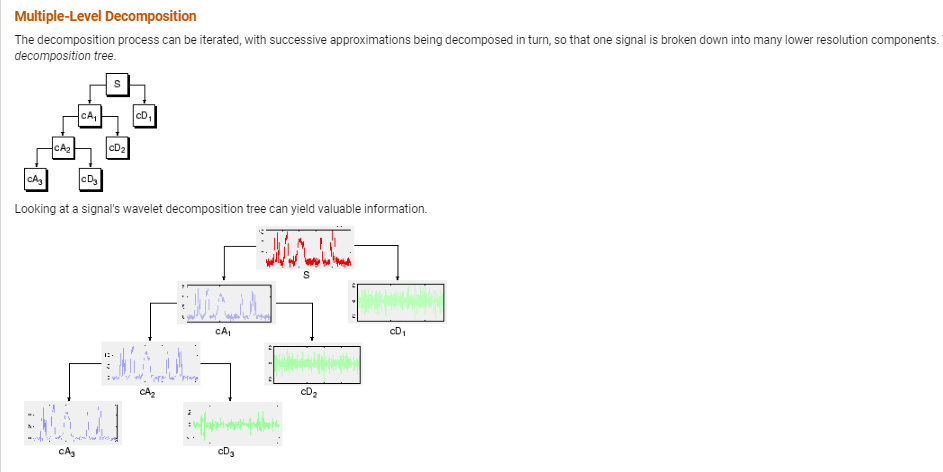

In [4]:
from IPython.display import Image
Image(filename='/content/gdrive/Othercomputers/PC/AI_DataScience_Training/AI_Healthcare/AI_Healthcare/Resources/wavelets decomposition tree.PNG') 

## Sym4 as mother Wavelet

<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1007%2Fs10916-018-1093-4/MediaObjects/10916_2018_1093_Fig7_HTML.png">

In [ ]:
def wavelet_denoising(x, wavelet, level):
    

    # Create wavelet object and define parameters
    w = pywt.Wavelet(wavelet)
    maxlev = pywt.dwt_max_level(len(x), w.dec_len)
    # maxlev = level # Override if desired
    print("maximum level is " + str(maxlev))
    threshold = 0.04 # Threshold for filtering

    # Decompose into wavelet components, to the level selected:
    coeffs = pywt.wavedec(x, wavelet, level=maxlev)
 
    coeffs[1:] = (pywt.threshold(i, value=threshold, mode='hard') for i in coeffs[1:])

    datarec = pywt.waverec(coeffs, 'sym4')
    return datarec 



In [ ]:
n_times = 4000
time = ecgDF['Time (s)'][:n_times].values
#signal = ecgDF['Channel 1 (V)'][:n_times].values

maximum level is 10


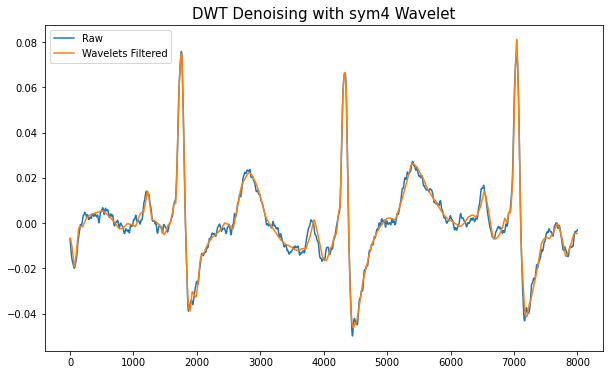

In [ ]:
wav = 'sym4'
#filtered = wavelet_denoising(signal, wavelet=wav, level=1) 
wav_filtered = wavelet_denoising(MA_filtered, wavelet=wav, level=2) 

plt.figure(figsize=(10, 6))
plt.plot(MA_filtered, label='Raw')
plt.plot(wav_filtered, label='Wavelets Filtered')
plt.legend()
plt.title(f"DWT Denoising with {wav} Wavelet", size=15)
plt.show()

NameError: ignored

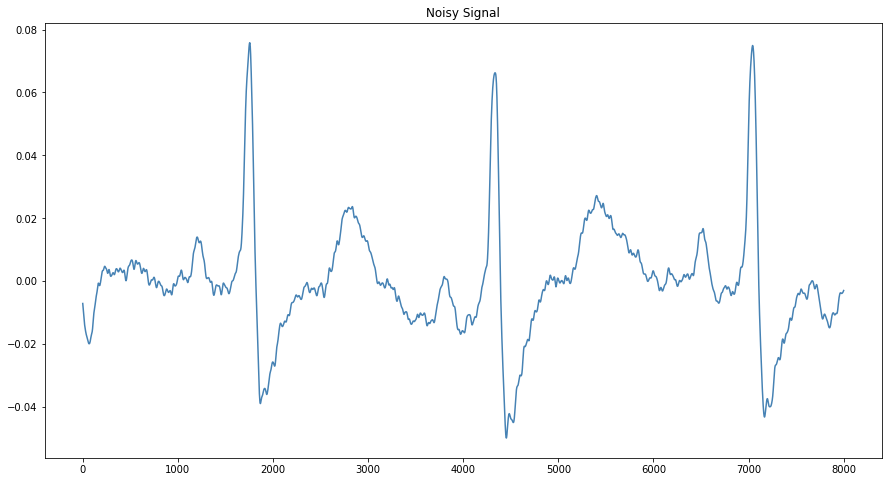

<Figure size 1080x576 with 0 Axes>

In [ ]:
# Wavelets Denoised Signal


plt.plot(MA_filtered, color='steelblue')
plt.title('Noisy Signal')
plt.figure()
plt.plot(dwt(MA_filtered), color='darkred')
plt.title('Wavelet Transform of Noisy Signal')
plt.figure()
plt.title('Soft Thresholded Transform Coefficients')
plt.plot(wt, color='darkred')
plt.figure()
plt.title('Reconstructed Signal after Thresholding')
plt.plot(rs, color='steelblue')

matplotlib.rc('figure', figsize=(15, 8))
plt.plot(ecgDF['Time (s)'],wav_filtered)